### **[1]** Выбрать один из датасетов

In [88]:
import pandas as pd
from sklearn import datasets


iris = datasets.load_iris()

### **[2]** Вывести в табличной форме статистику по датасету, включая
- Размерность всего датасета
- Количество признаков

Выбрать три класса и четыре количественных (недискретных) признака. Сформировать на их основе «отфильтрованный» датасет для дальнейшего анализа, удалив из датасета все объекты, для которых не определены значения хотя бы одного из выбранных четырех количественных признаков.

In [89]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])
feature_columns = [col for col in df.columns if col not in ['target', 'target_name']]
display(df)

print(f'Размерность датасета: {iris.data.shape}')
print(f'Количество признаков: {len(feature_columns)}')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Размерность датасета: (150, 4)
Количество признаков: 4


- Количество целевых классов и объектов в каждом из классов

In [90]:
print(f'Количество целевых классов: {df['target'].nunique()}')


print('Количество объектов в каждом из классов:')
df['target_name'].value_counts()

Количество целевых классов: 3
Количество объектов в каждом из классов:


target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

- Процент объектов с неопределенными признаками 

In [91]:
percent_missing = (df.isnull().sum() / len(df)) * 100
print('Процент объектов с неопределенными признаками:')
percent_missing

Процент объектов с неопределенными признаками:


sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
target_name          0.0
dtype: float64

- Иные ключевые характеристики датасета

In [92]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### [3] Выполнить визуализацию датасета по всем парам выбранных количественных переменных, обозначая: - в графиках с разными парами переменных объекты из разных классов различными по форме и цвету точками, - в графиках с одной и той же парой переменных – гистограммы с достаточным числом разбиений (обычно – не менее 20), либо плотности распределения переменной по оси признака.

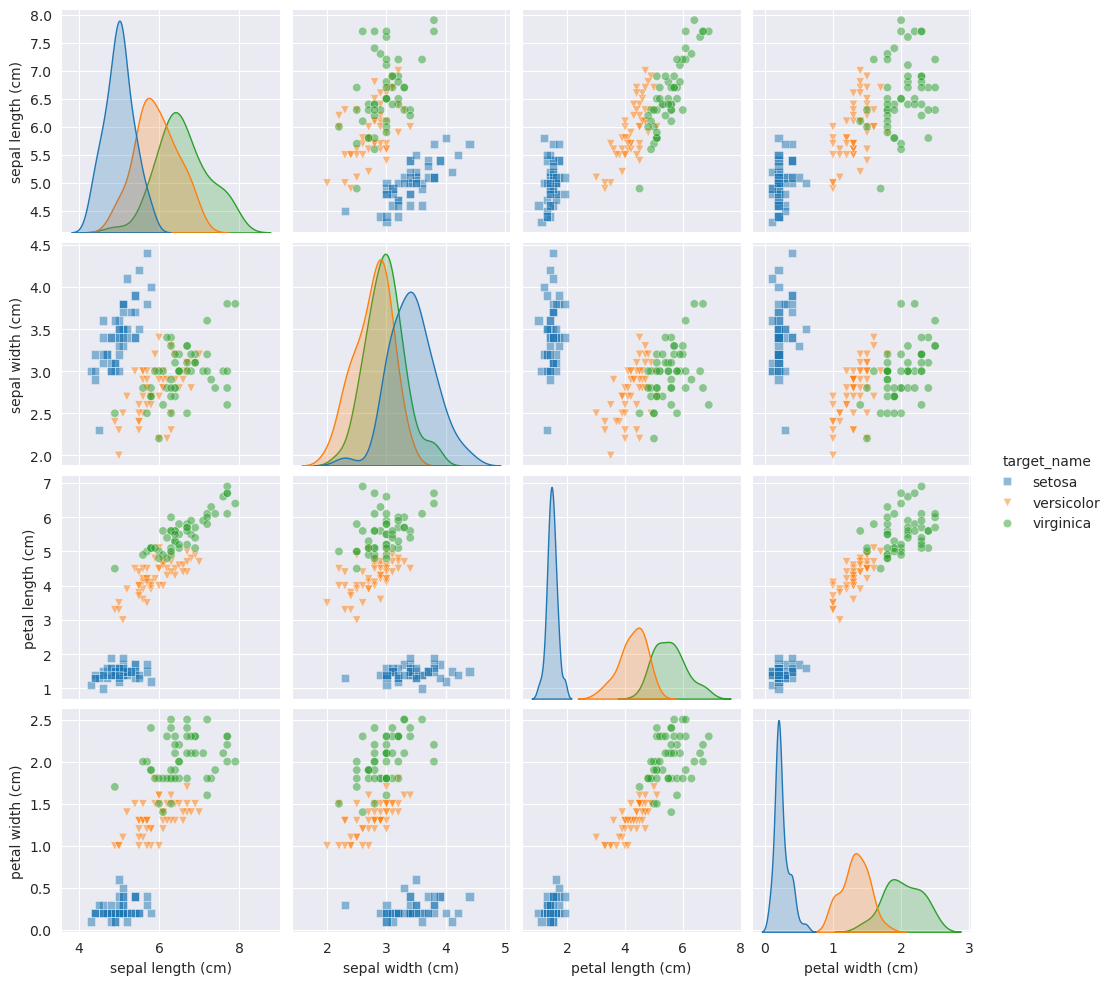

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.drop(columns='target'), hue='target_name', markers=['s', 'v', 'o'],  plot_kws={'alpha': 0.5} )
plt.show()

### [4] В табличном варианте оценить степень сопряженности пар признаков- переменных на всем датасете, используя коэффициент корреляции Пирсона.

In [94]:
correlation_matrix = df.drop(columns=['target', 'target_name']).corr()
display(correlation_matrix)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


В табличном варианте оценить степень сопряженности пар признаков-переменных в каждом классе датасета, используя коэффициент корреляции Пирсона.

In [95]:
for class_value in df['target_name'].drop(columns='target').unique():
    class_df = df[df['target_name'] == class_value].drop(columns=['target', 'target_name'])
    corr_matrix_class = class_df.corr()
    
    print(f'Корреляционная матрица для класса {class_value}:')
    display(corr_matrix_class)

Корреляционная матрица для класса setosa:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000


Корреляционная матрица для класса versicolor:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


Корреляционная матрица для класса virginica:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


### [5] Выбрать пару целевых классов и все количественные признаки. Используя метод LDA (линейный дискриминантный анализ), построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные объекты классов на всех парах количественных признаков.

In [96]:
selected_classes = [1, 2]

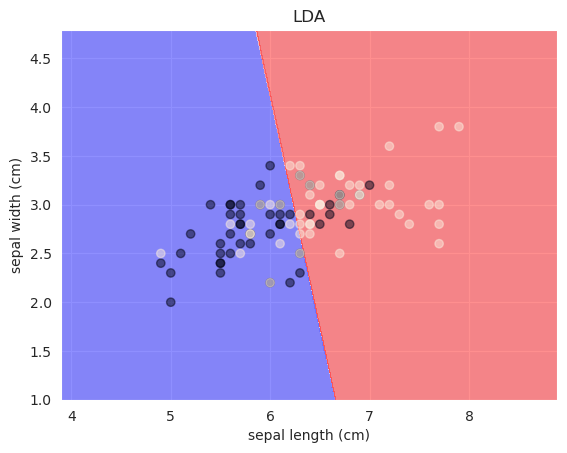

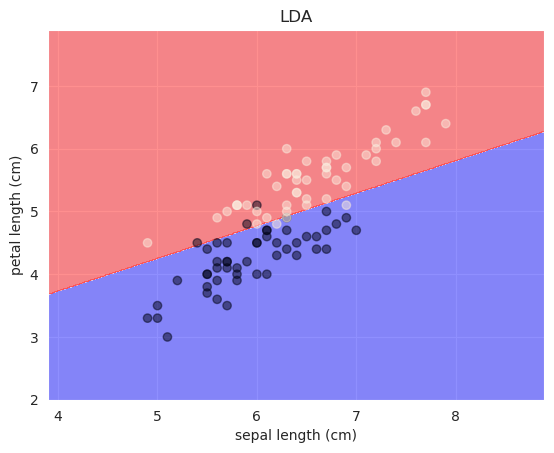

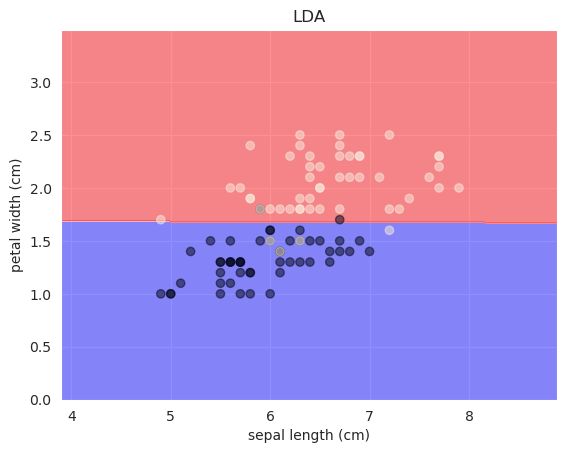

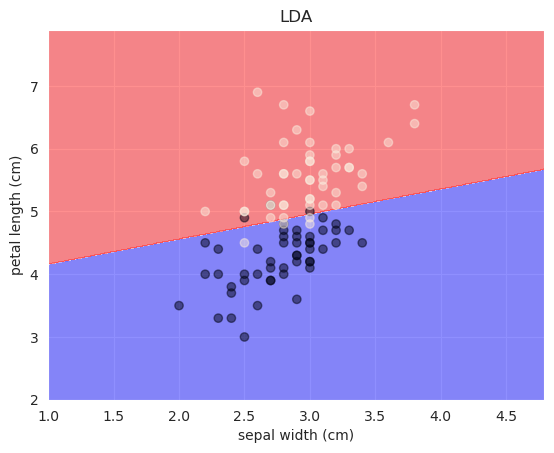

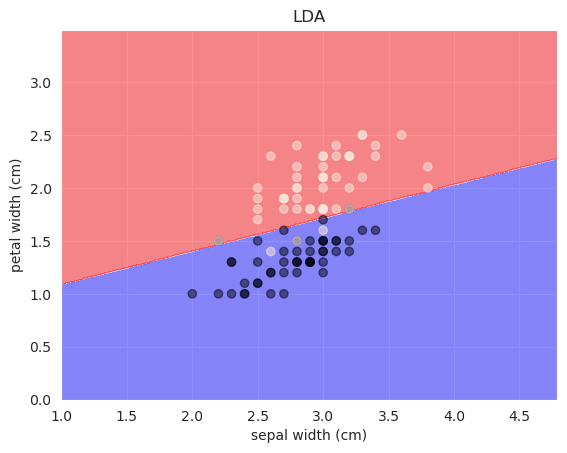

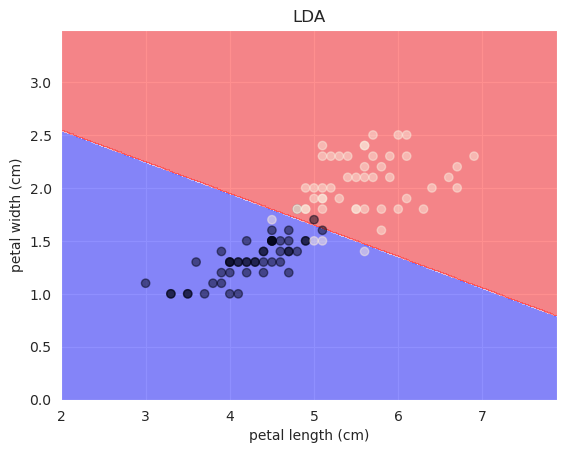

In [97]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from itertools import combinations


def plot_decision_boundaries(x, y, model, title):
    model_instance = model()
    model_instance.fit(x, y)
    
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    z = model_instance.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) 

    plt.contourf(xx, yy, z, cmap='bwr', alpha=0.5)

    plt.scatter(x[:, 0], x[:, 1], c=y.cat.codes, alpha=0.5)
    plt.title(title)

df_filtered = df[df['target'].isin(selected_classes)]
feature_pairs = list(combinations(range(len(df_filtered.columns) - 2), 2)) 

for pair in feature_pairs:
    x_pair = df_filtered.iloc[:, list(pair)].to_numpy() 
    y_pair = df_filtered["target"].astype('category')
    plot_decision_boundaries(x_pair, y_pair, LDA, 'LDA')
    plt.xlabel(df_filtered.columns[pair[0]])
    plt.ylabel(df_filtered.columns[pair[1]])
    plt.show()

### [6] Для одной из пар количественных признаков из пункта [5] на одном рисунке одновременно построить (а) решающую функцию LDA и (б) линейную регрессию одного количественного признака от другого

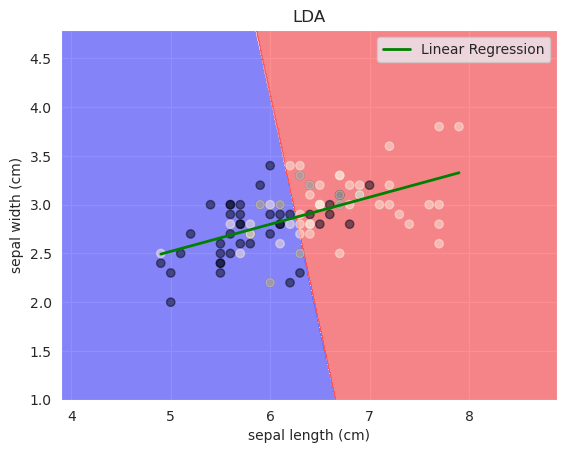

In [98]:
from sklearn.linear_model import LinearRegression

pair = feature_pairs[0]
x_pair = df_filtered.iloc[:, list(pair)].to_numpy() 
y_pair = df_filtered["target"].astype('category')
plot_decision_boundaries(x_pair, y_pair, LDA, 'LDA')
reg = LinearRegression()
reg.fit(x_pair[:, [0]], x_pair[:, 1])
x_pred = np.linspace(x_pair[:, 0].min(), x_pair[:, 0].max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_pred)
plt.plot(x_pred, y_pred, color='green', linewidth=2, label='Linear Regression')
plt.xlabel(df_filtered.columns[pair[0]])
plt.ylabel(df_filtered.columns[pair[1]])
plt.legend()
plt.show()

### [7] Выбрать два количественных признака и пару целевых классов На отдельных рисунках с осями количественных признаков построить решающие функции, разграниченные решающей функцией зоны и отдельные объекты классов для методов (а) LDA, (б) SVM, (в) логистическая регрессия, (г) наивный байесовский классификатор

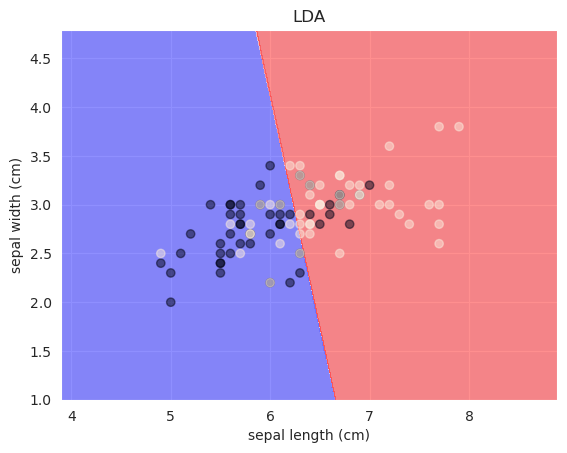

In [99]:
plot_decision_boundaries(x_pair, y_pair, LDA, 'LDA')
plt.xlabel(df_filtered.columns[pair[0]])
plt.ylabel(df_filtered.columns[pair[1]])
plt.show()

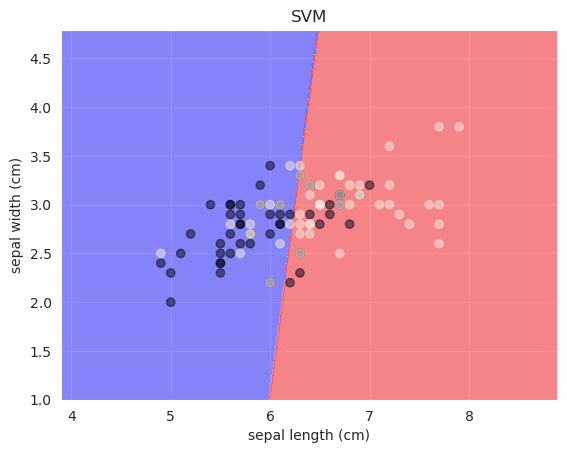

In [100]:
from sklearn.svm import LinearSVC as SVM
plot_decision_boundaries(x_pair, y_pair, SVM, 'SVM')
plt.xlabel(df_filtered.columns[pair[0]])
plt.ylabel(df_filtered.columns[pair[1]])
plt.show()

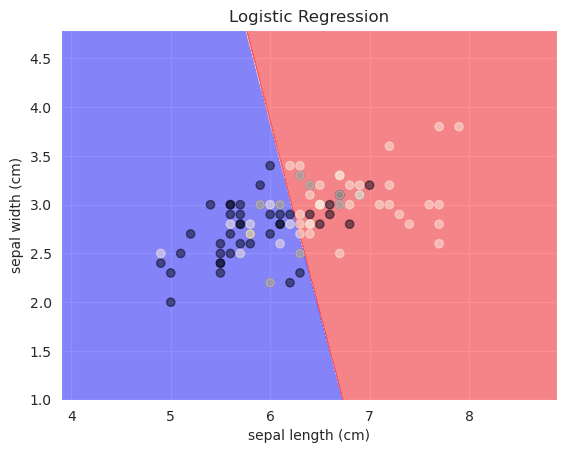

In [101]:
from sklearn.linear_model import LogisticRegression
plot_decision_boundaries(x_pair, y_pair, LogisticRegression, 'Logistic Regression')
plt.xlabel(df_filtered.columns[pair[0]])
plt.ylabel(df_filtered.columns[pair[1]])
plt.show()

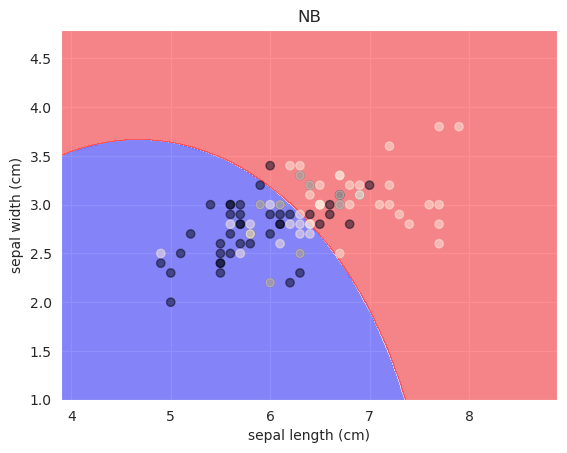

In [102]:
from sklearn.naive_bayes import GaussianNB as NB
plot_decision_boundaries(x_pair, y_pair, NB, 'NB')
plt.xlabel(df_filtered.columns[pair[0]])
plt.ylabel(df_filtered.columns[pair[1]])
plt.show()

### [8] Выбрать целевой класс и для каждого метода из пункта [7]:
- Вывести матрицу ошибок.
- Вывести значения sensitivity, specificity, precision, recall.
- Построить ROC кривую и рассчитать метрику AUC.

In [103]:
df_filtered["target"]

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 100, dtype: int64

In [104]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

selected_classes = [1, 2]

def method_metrics(x, y, model, title):
    print(title)
    target_class = y[0]
    print(f"Целевой класс: {target_class}")
    model_instance = CalibratedClassifierCV(model()) if model == SVM else model()
    model_instance.fit(x, y)
    pred_df = pd.DataFrame({'true': y, 'pred': model_instance.predict(x)})
    
    tp = ((pred_df['true'] == target_class) & (pred_df['pred'] == target_class)).sum()
    fp = ((pred_df['true'] != target_class) & (pred_df['pred'] == target_class)).sum()
    fn = ((pred_df['true'] == target_class) & (pred_df['pred'] != target_class)).sum()
    tn = ((pred_df['true'] != target_class) & (pred_df['pred'] != target_class)).sum()
    print(f'TP: {tp} FP: {fp}')
    print(f'FN: {fn} TN: {tn}')
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}")
    
    y_scores = model_instance.predict_proba(x)[:, 0]
    y_true = pred_df['true'] == target_class
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    print(f"AUC: {auc(fpr, tpr)}")
    
    plt.plot(fpr, tpr, color='blue', linewidth=5)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title(title)
    plt.grid()
    plt.axis('square')
    plt.show()

LDA
Целевой класс: 1
TP: 47 FP: 4
FN: 3 TN: 46
sensitivity: 0.94, specificity: 0.92, precision: 0.9215686274509803
AUC: 0.9846


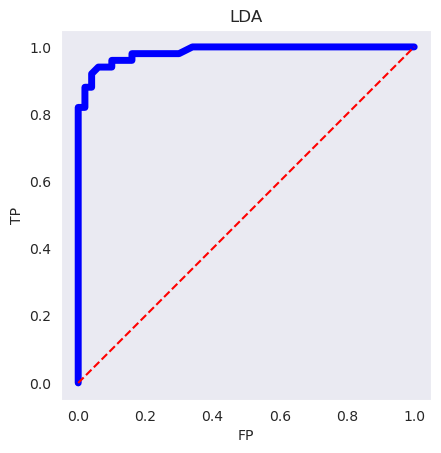

In [105]:
method_metrics(df_filtered.iloc[:, selected_classes].to_numpy(), df_filtered["target"].to_numpy(), LDA, "LDA")

SVM
Целевой класс: 1
TP: 45 FP: 5
FN: 5 TN: 45
sensitivity: 0.9, specificity: 0.9, precision: 0.9
AUC: 0.9738


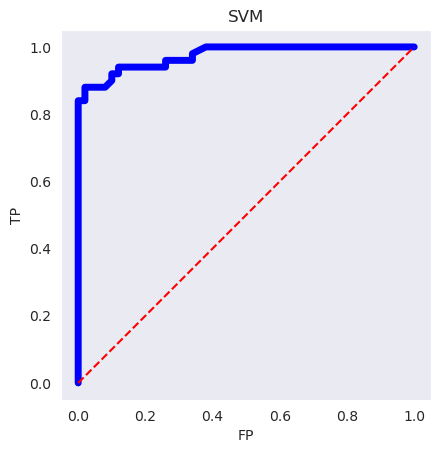

In [106]:
method_metrics(df_filtered.iloc[:, selected_classes].to_numpy(), df_filtered["target"].to_numpy(), SVM, "SVM")

Logistic Regression
Целевой класс: 1
TP: 46 FP: 3
FN: 4 TN: 47
sensitivity: 0.92, specificity: 0.94, precision: 0.9387755102040817
AUC: 0.983


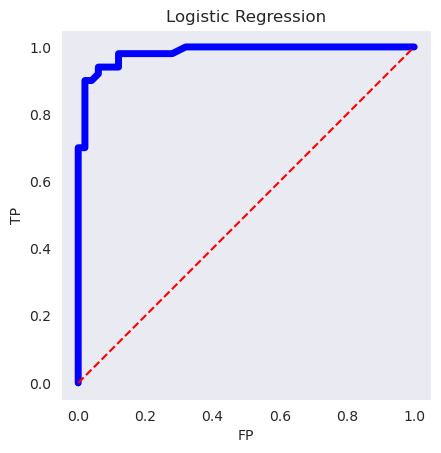

In [107]:
method_metrics(df_filtered.iloc[:, selected_classes].to_numpy(), df_filtered["target"].to_numpy(), LogisticRegression, "Logistic Regression")

NB
Целевой класс: 1
TP: 46 FP: 8
FN: 4 TN: 42
sensitivity: 0.92, specificity: 0.84, precision: 0.8518518518518519
AUC: 0.9718


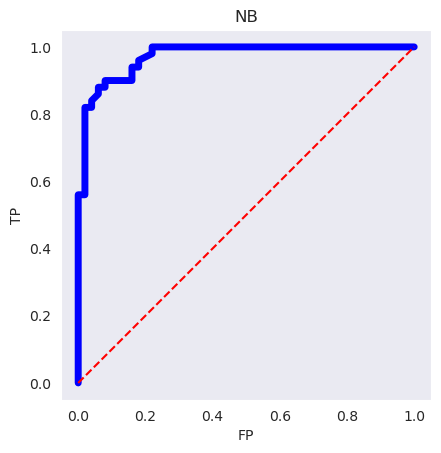

In [108]:
method_metrics(df_filtered.iloc[:, selected_classes].to_numpy(), df_filtered["target"].to_numpy(), NB, "NB")